In [32]:
%matplotlib inline
#%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [33]:
s1, s2, s3 = 'cluster', 'field', 'sim'

In [34]:
s = {}

# === Cluster galaxies
# Pe, Ps: probability to be elliptical or sprials (from galaxy zoo)
s[s1] = pd.read_fwf(
    'sample1_cls.dat', 
    names=['cls','ra','dec','z','Mr01','ur','mur','kr50','C','stellarmass','sfr','ssfr','Dn4000','class','Zc','sigma','Mvir','Rvir','R200','w','dist','Pe','Ps'],
    skiprows=1
)
# === Field galaxies
s[s2] = pd.read_fwf(
    'sample2_field.dat', 
    names=['ra','dec','z','Mr01','ur','mur','kr50','C','stellarmass','sfr','ssfr','Dn4000','OH','w','Pe','Ps'],
    skiprows=1
)

# === Semi-analytic model
semianalytic = pd.read_fwf(
    'sample3_sim.dat', 
    names=['cls','ig','type','clase','stellarmass','u','g','r','sfr','Mcoldgas','Mhotgas','Tau','OH','bt','ssfr'],
    skiprows=1
)
semianalytic['ur'] = semianalytic['u']-semianalytic['r']


## `sample1.dat` $\rightarrow{}$ Cluster objects

| columnas | descripción |
|:--------:|:-----------|
|'z' | redshift|
|'Mr01'| magnitud absoluta en la banda r a 0.1|
|'ur'| color u-r|
|'mur'| (?)|
|'kr50'| r_50 en kpc(?)|
|'C'| indice de concentración|
|'stellarmass'| masa estelar|
|'sfr'| tasa de formación estelar [$M_{\odot} \mathrm{yr}^{-1}$]|
|'ssfr'| tasa de formación estelar especifica [?]|
|'Dn4000'| 4000 A break (ratio between the average flux density between 4050 and<br> 4250A and that between 3750 and 3950A) [$\mathrm{ergs}^{−1} \mathrm{cm}^{−2} \mathrm{Hz}^{−1}$] |
|'class'| tipo de galaxia en el cúmulo (-1,1,2,3,4,5) (?)|
|'Zc'| redshift del cluster|
|'sigma'| dispersión de velocidad (?)|
|'Mvir'| masa encerrada al radio virial|
|'Rvir'| radio virial|
|'R200'| radio que encierra 200 veces la densidad media del Universo|
|'w'| peso $1/V_{max}$|
|'dist'| distancia al centro del cumulo (?)|
|'Pe'| probabilidad de ser eliptica, según galaxy-zoo|
|'Ps'| probabilidad de ser espiral, según galaxy-zoo|


In [35]:
s['cluster'].query('Rvir < 30 and C<4.5 and Dn4000<2.5 and Dn4000>0.5', inplace=True)

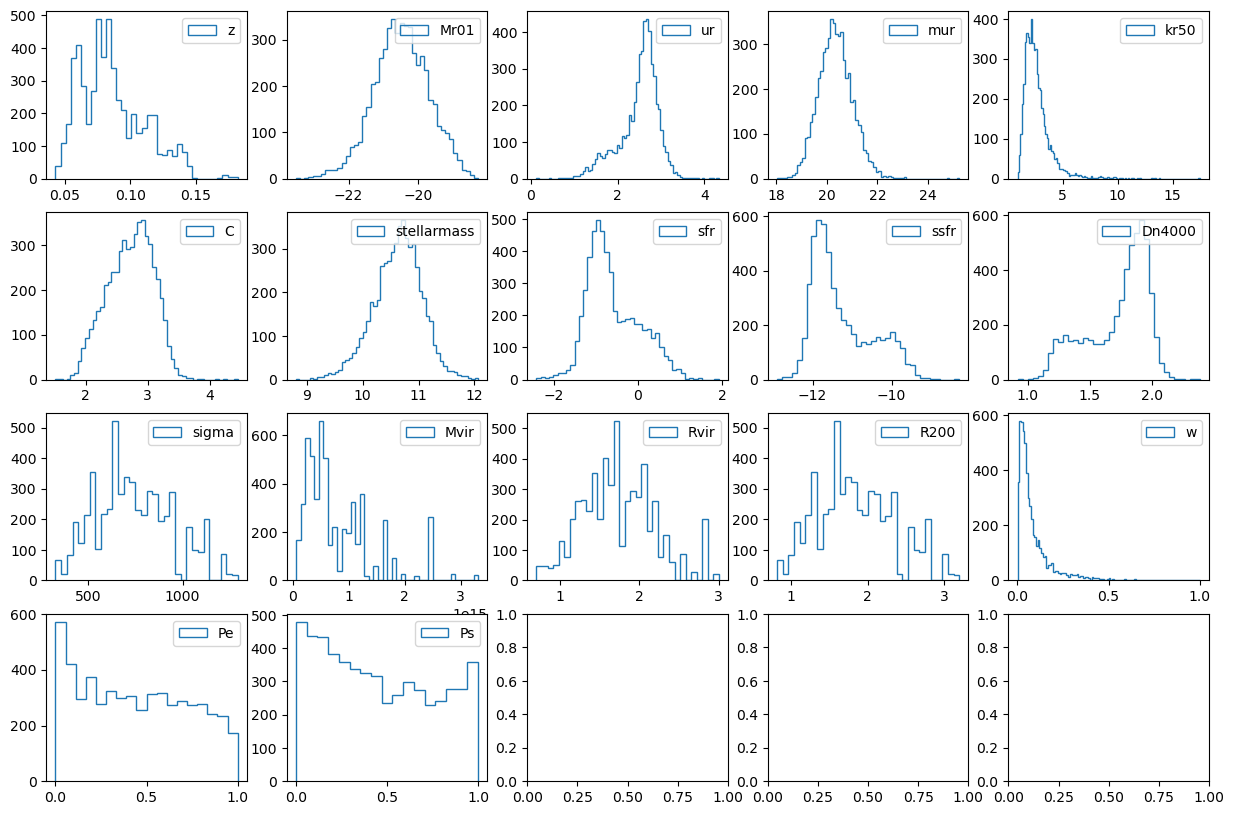

In [64]:
fig, axes = plt.subplots(4,5, figsize=(15,10))
cols = ['z','Mr01','ur','mur','kr50','C','stellarmass','sfr','ssfr','Dn4000', 'sigma','Mvir','Rvir','R200', 'w','Pe','Ps']

for col, ax in zip(cols,axes.flatten()):
    ax.hist(s[s1][col], bins='auto', label=col, histtype='step')
    ax.legend(loc='upper right')

## `sample2.dat` $\rightarrow{}$ Field objects

| columnas | descripción |
|:--------:|:-----------|
|'z' | redshift|
|'Mr01'| magnitud absoluta en la banda r a 0.1|
|'ur'| color u-r|
|'mur'| (?)|
|'kr50'| r_50 en kpc(?)|
|'C'| indice de concentración|
|'stellarmass'| masa estelar|
|'sfr'| tasa de formación estelar [$M_{\odot} \mathrm{yr}^{-1}$]|
|'ssfr'| tasa de formación estelar especifica [?]|
|'Dn4000'| 4000 A break (ratio between the average flux density between 4050 and<br> 4250A and that between 3750 and 3950A) [$\mathrm{ergs}^{−1} \mathrm{cm}^{−2} \mathrm{Hz}^{−1}$] |
|'OH'| (?)|
|'w'| peso $1/V_{max}$|
|'dist'| distancia al centro del cumulo (?)|
|'Ps'| probabilidad de ser espiral, según galaxy-zoo|

In [37]:
s['field'].query('stellarmass > 8 and sfr > -8 and ur < 5 and kr50 < 20 and C < 5 and ur > 0 and Dn4000<2.5 and Dn4000>0.8 and Ps>0 and Pe>0', inplace=True)

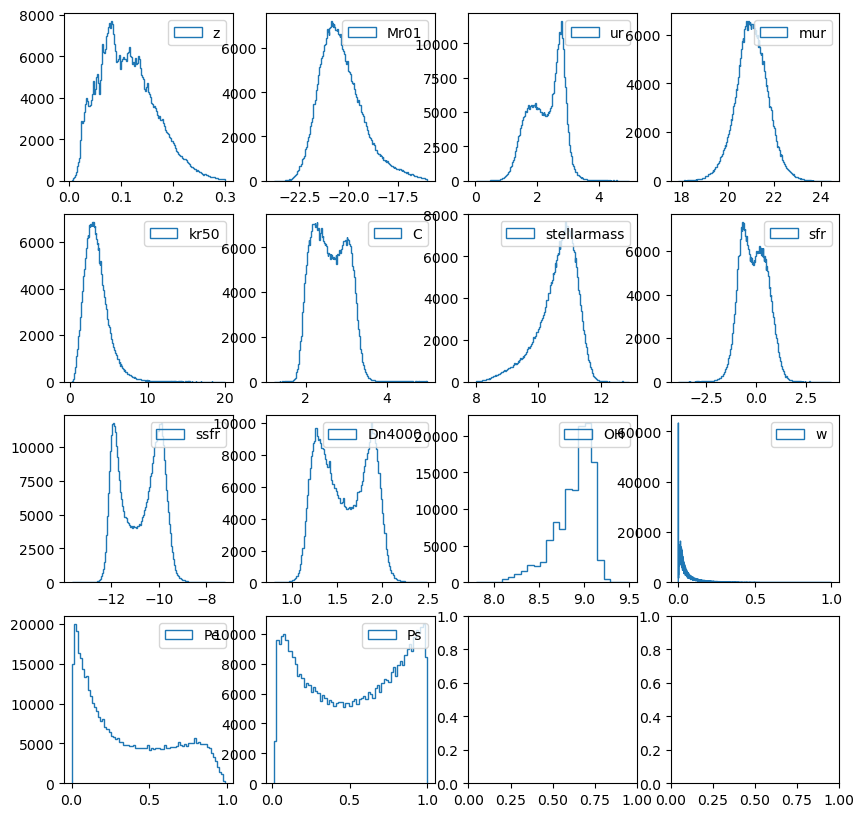

In [38]:
fig, axes = plt.subplots(4,4, figsize=(10,10))
cols = ['z','Mr01','ur','mur','kr50','C','stellarmass','sfr','ssfr','Dn4000','OH','w','Pe','Ps']

for col, ax in zip(cols,axes.flatten()):
    if col=='OH':
        ax.hist(s[s2][col], bins=np.linspace(7.8,9.5,25), label=col, histtype='step')
    else:
        ax.hist(s[s2][col], bins='auto', label=col, histtype='step')
    
    ax.legend(loc='upper right')

## `sample3.dat` $\rightarrow{}$ Semi-analytic model

| columnas | descripción |
|:--------:|:-----------|
|'cls' | cluster id |
|'ig' | galaxy id |
|'type'| (?) |
|'stellarmass'| masa estelar|
|'u'| u band magnitude|
|'g'| g band magnitude|
|'r'| r band magnitude|
|'sfr'| tasa de formación estelar [$M_{\odot} \mathrm{yr}^{-1}$]|
|'Mcoldgas'| masa de gas frio [$\log M_{\odot}$] |
|'Mhotdgas'| masa de gas caliente [$\log M_{\odot}$] |
|'Tau'| edad de la galaxia [?]|
|'OH'| (?) |
|'bt'| (?) |
|'ssfr'| tasa de formación estelar especifica [?]|

In [41]:
semianalytic.query('Mhotgas != 99 and Mcoldgas != 99 and sfr!=99', inplace=True)

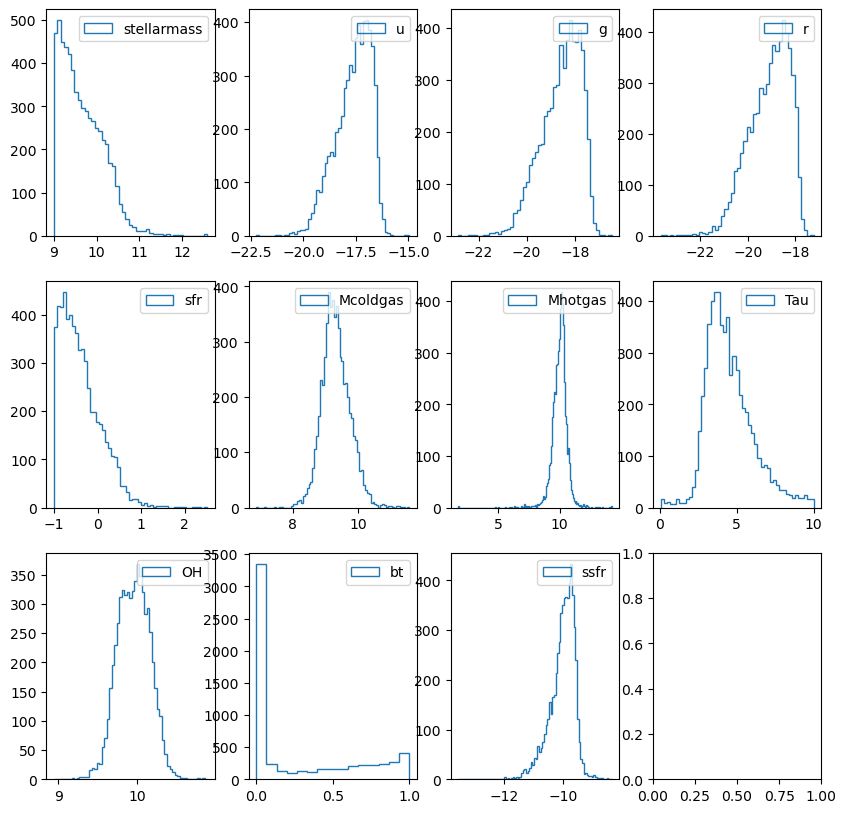

In [42]:
fig, axes = plt.subplots(3,4, figsize=(10,10))
cols = ['stellarmass','u','g','r','sfr','Mcoldgas','Mhotgas','Tau','OH','bt','ssfr']

for col, ax in zip(cols,axes.flatten()):
    ax.hist(semianalytic[col], bins='auto', label=col, histtype='step')
    ax.legend(loc='upper right')

## eee

Text(0.5, 0, 'redshift')

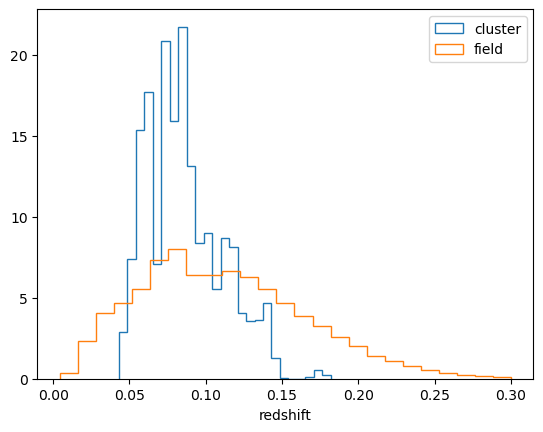

In [44]:
# redshift distributions

fig, ax = plt.subplots()
for name, sample in s.items():
    ax.hist(sample['z'], bins=25, density=True, histtype='step', label=name)
ax.legend()
#plt.semilogy()
ax.set_xlabel('redshift')

In [45]:
redshift_cut = 'z < 0.14 and z > 0.05'
s_zcut = {}

for k,v in s.items():
    s_zcut[k] = v.query(redshift_cut)

Text(0.5, 0, 'redshift')

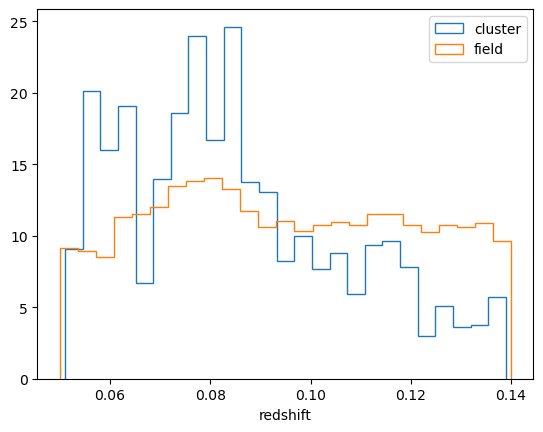

In [47]:
# redshift distributions

fig, ax = plt.subplots()
for name, sample in s_zcut.items():
    ax.hist(sample['z'], bins=25, density=True, histtype='step', label=name)
ax.legend()
#plt.semilogy()
ax.set_xlabel('redshift')

Text(0, 0.5, 'Magnitud')

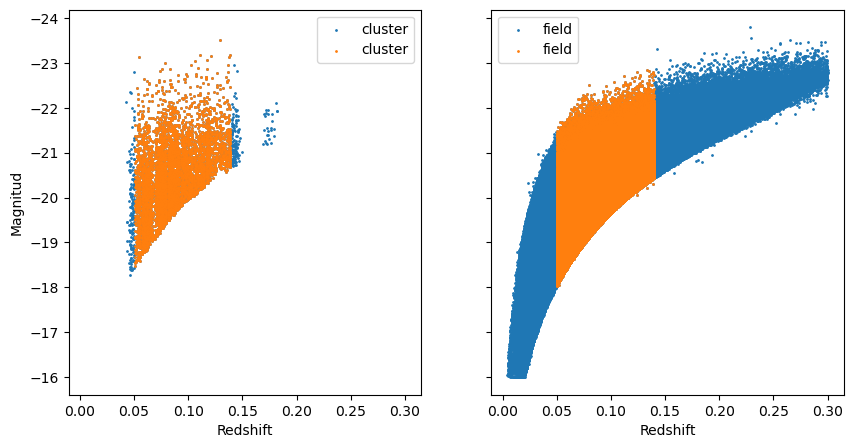

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,5), sharex=True, sharey=True)
for ax, sample in zip(axes.flatten(), [s1, s2]): 
    ax.scatter(s[sample]['z'], s[sample]['Mr01'], s=1, label=sample)
    ax.scatter(s_zcut[sample]['z'], s_zcut[sample]['Mr01'], s=1, label=sample)
    ax.legend()
    ax.set_xlabel('Redshift')

axes[0].invert_yaxis()
axes[0].set_ylabel('Magnitud')

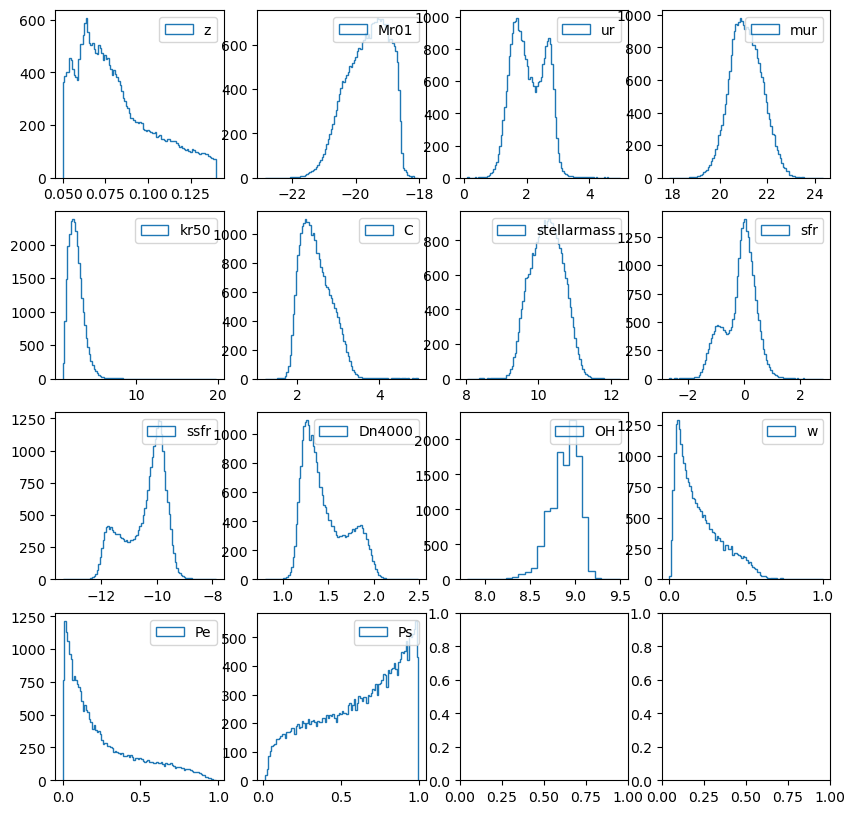

In [67]:
fig, axes = plt.subplots(4,4, figsize=(10,10))
cols = ['z','Mr01','ur','mur','kr50','C','stellarmass','sfr','ssfr','Dn4000','OH','w','Pe','Ps']

for col, ax in zip(cols,axes.flatten()):
    if col=='OH':
        ax.hist(s_zcut[s2][col], bins=np.linspace(7.8,9.5,25), weights=s_zcut[s2]['w'], label=col, histtype='step')
    else:
        ax.hist(s_zcut[s2][col], bins=100, weights=s_zcut[s2]['w'], label=col, histtype='step')
    
    ax.legend(loc='upper right')

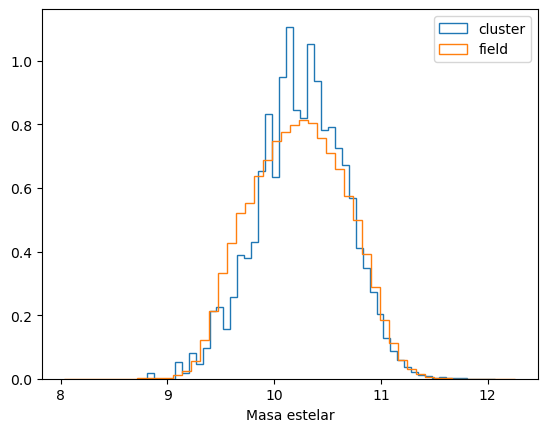

In [52]:

fig, ax = plt.subplots()
ax.hist(s_zcut['cluster']['stellarmass'], bins=50, label='cluster', histtype='step', weights=s_zcut['cluster']['w'], density=True)
ax.hist(s_zcut['field']['stellarmass'], bins=50, label='field', histtype='step', weights=s_zcut['field']['w'], density=True)
ax.set_xlabel('Masa estelar')
ax.legend()
plt.show()

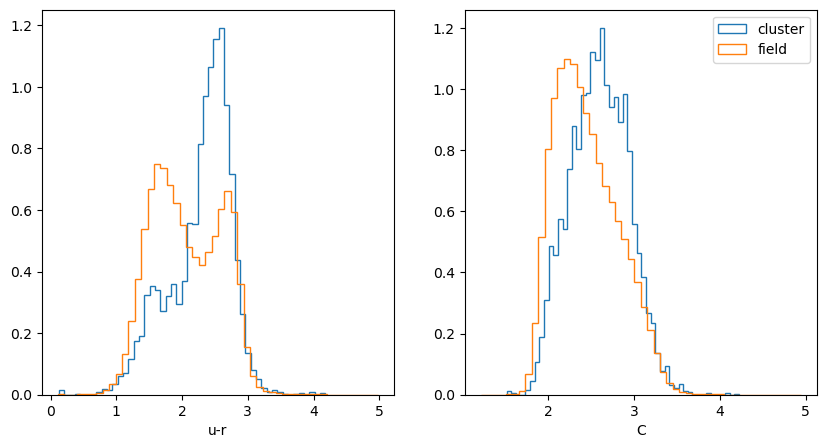

In [61]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
for k,v in s_zcut.items():
    ax1.hist(v['ur'], bins=50, weights=v['w'], density=True, histtype='step', label=k)
    ax2.hist(v['C'], bins=50, weights=v['w'], density=True, histtype='step', label=k)

ax1.set_xlabel('u-r')
ax2.set_xlabel('C')
ax2.legend()
plt.show()

# etc

KeyError: 's2'

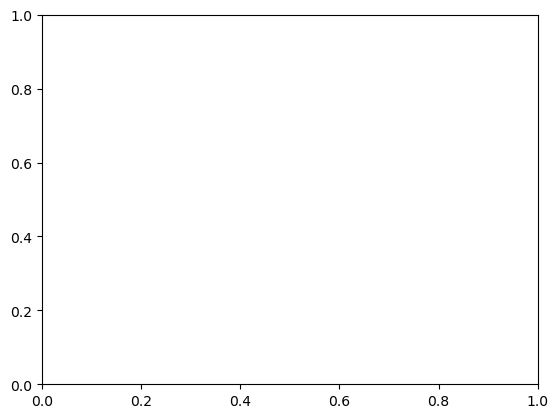

In [ ]:
# 

fig, ax = plt.subplots()
ax.scatter(s['s2'].head(10000)['Mr01'], s['s2'].head(10000)['ur'], s=1, alpha=0.5, label='s2')
ax.scatter(s['s1']['Mr01'], s['s1']['ur'], s=1, alpha=0.5, label='s1')
ax.legend()

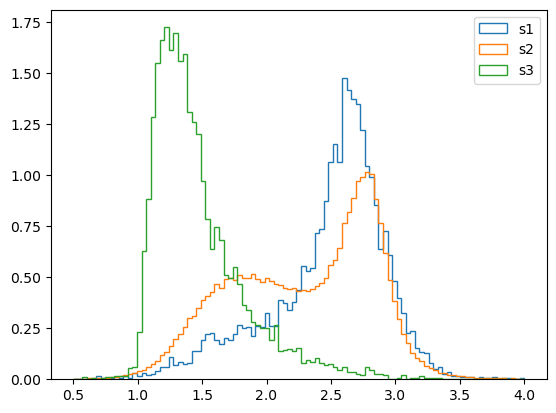

In [ ]:
# 

fig, ax = plt.subplots()
for name, sample in s.items():
    ax.hist(sample['ur'], bins=np.linspace(0.5,4,100), density=True, histtype='step', label=name)
ax.legend()

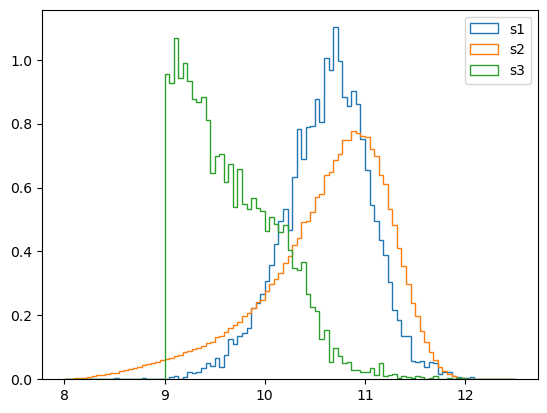

In [ ]:
# 

fig, ax = plt.subplots()
for name, sample in s.items():
    ax.hist(sample['stellarmass'], bins=np.linspace(8,12.5,100), density=True, histtype='step', label=name)
ax.legend()

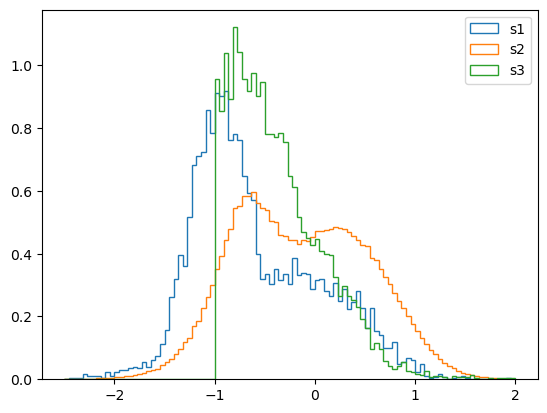

In [ ]:
# 

fig, ax = plt.subplots()
for name, sample in s.items():
    ax.hist(sample['sfr'], bins=np.linspace(-2.5,2,100), density=True, histtype='step', label=name)
ax.legend()


(array([0.        , 0.        , 0.        , 0.00249358, 0.        ,
        0.00249358, 0.        , 0.        , 0.        , 0.00249358,
        0.        , 0.        , 0.        , 0.        , 0.00249358,
        0.        , 0.00249358, 0.        , 0.00249358, 0.        ,
        0.        , 0.        , 0.00498715, 0.01496146, 0.02493577,
        0.03740366, 0.0324165 , 0.02992293, 0.06732658, 0.07979447,
        0.13465317, 0.12218528, 0.19948617, 0.29673568, 0.37902373,
        0.51617047, 0.61840713, 0.73311168, 0.86028412, 1.04979598,
        1.00989875, 1.00740517, 0.98745655, 0.97249509, 0.83285477,
        0.78298323, 0.65581079, 0.62090071, 0.56354844, 0.47876681,
        0.44136316, 0.34660722, 0.33912649, 0.25434487, 0.17953755,
        0.14462747, 0.09475593, 0.07730089, 0.06732658, 0.02992293,
        0.02742935, 0.01745504, 0.00748073, 0.00748073, 0.01745504,
        0.01496146, 0.00249358, 0.00498715, 0.00498715, 0.00249358,
        0.        , 0.00498715, 0.00748073, 0.  

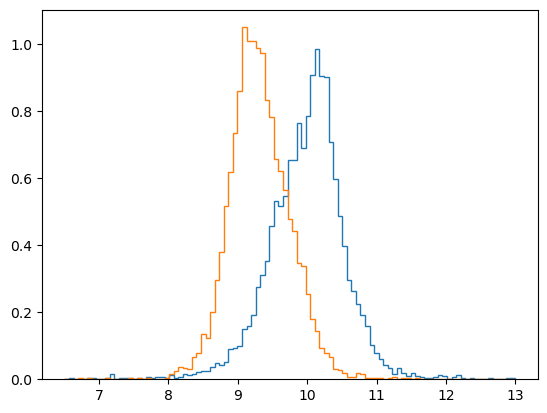

In [ ]:
# 
plt.hist(s['s3']['Mhotgas'], bins=np.linspace(6.5,13,100), density=True, histtype='step')
plt.hist(s['s3']['Mcoldgas'], bins=np.linspace(6.5,13,100), density=True, histtype='step')

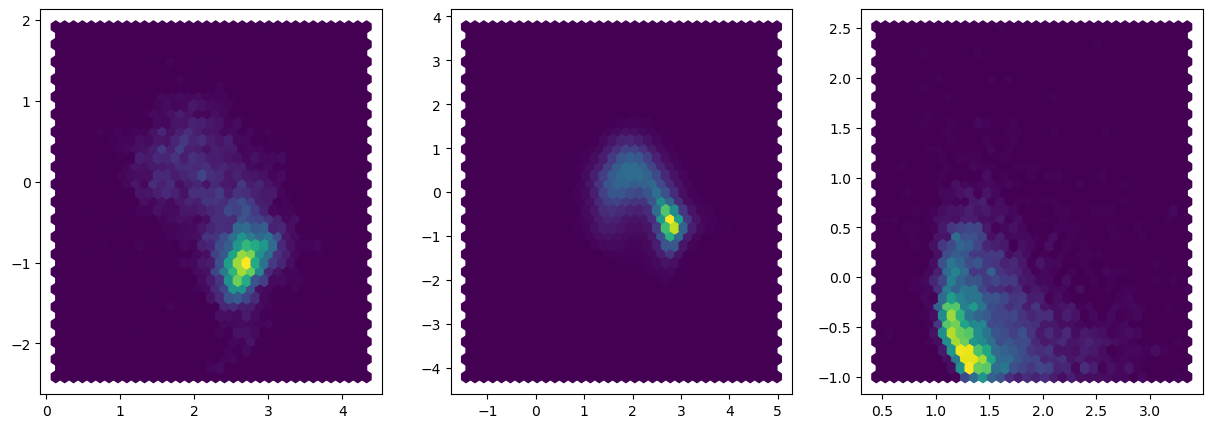

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
for sam, ax in zip(s.values(), axes):
    ax.hexbin(sam['ur'], sam['sfr'], gridsize=35)

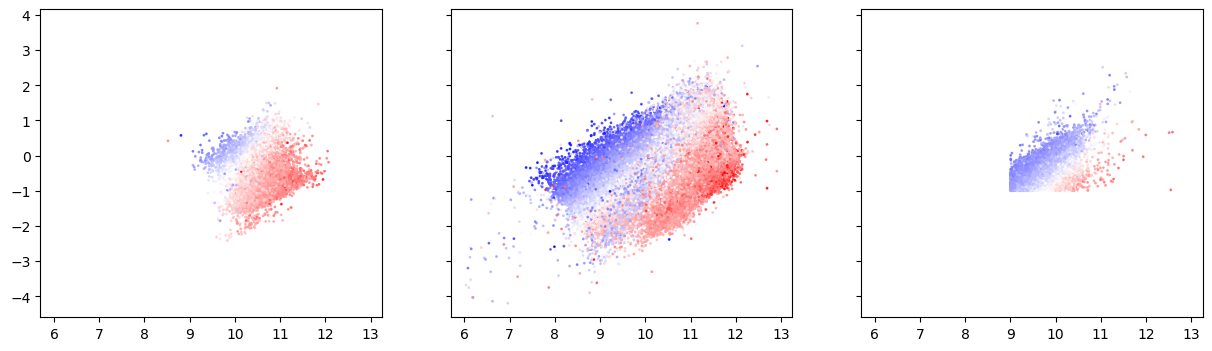

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,4), sharex=True, sharey=True)
for sam, ax in zip(s.values(), axes):
    #ax.hexbin(sam['stellarmass'], sam['sfr'], gridsize=50)
    ax.scatter(sam['stellarmass'], sam['sfr'], s=1, c=sam['ur'], vmin=0, vmax=4, cmap='bwr', alpha=0.8)